In [32]:
import warnings
warnings.filterwarnings('ignore')
from numpy.testing import assert_array_equal, assert_array_almost_equal, assert_equal, assert_almost_equal
from pandas.testing import assert_frame_equal

In [6]:
from setup_libs import *
from plot_clas import *

# 1. X-regression

Необходимо найти наилучшие параметры для XGBRegressor, обучить модель и вернуть ее. Данные из гита `Financial Distress.csv`.

Сам гридсерч или нативное исследование необходимо делать вне функции обработки, чтобы не получить TL.

# TASK

In [ ]:
def xreg(X_train, y_train):
    ### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
    return model

In [11]:
df = pd.read_csv('data/Financial Distress.csv')

X = df.drop('Financial Distress', axis=1)
y = df['Financial Distress']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=17)

xgb_model = xreg(X_train, y_train)
y_pred = xgb_model.predict(X_test)

assert type(xgb_model) == xgb.sklearn.XGBRegressor
assert MSE(y_pred, y_test) < 3

[14:00:46] WARNING: ../src/learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




# 2. CatFeatures

Обучите модель классификации катбуста на предложенных данных и верните обученную модель. 

Воспользуйтесь встроенной обработкой категориальных признаков. Не забудьте обработать Nan значения.


# TASK

In [ ]:
def catfeatures(df: pd.DataFrame):
    ### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
    return model

In [65]:
df = pd.read_csv('data/flight_delays_train.csv')
df_train = df[:1000]
model = catfeatures(df_train)


assert type(model) == catboost.CatBoostClassifier

df_test = pd.read_csv('data/flight_catfeature_test.csv')
df_test = df_test.drop('Unnamed: 0', axis=1)
X_test = df_test.drop('dep_delayed_15min',axis=1)
y_test = df_test['dep_delayed_15min']

y_pred = model.predict(X_test)
assert accuracy_score(y_test, y_pred) > 0.80 
assert accuracy_score(y_test, y_pred) < 0.87 


# 3. LightGBM

Вашем вниманию представляется прокаченный градиентный бустинг `LightGBM`. Разобраться в нем вам предлагается самостоятельно, например по [статье на хабре](https://habr.com/ru/company/skillfactory/blog/530594/). 

А в задачке, ва необходимо (опять...) найти наилучшие параметры для LGBMRegressor, обучить модель и вернуть ее. Данные из гита `Financial Distress.csv`.

Сам гридсерч или нативное исследование необходимо делать вне функции обработки, чтобы не получить TL.

# TASK

In [ ]:
def lgbmreg(X_train, y_train):
    ### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
    return model

In [50]:
df = pd.read_csv('data/Financial Distress.csv')

X = df.drop('Financial Distress', axis=1)
y = df['Financial Distress']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=17)

lgbm_model = lgbmreg(X_train, y_train)
y_pred = lgbm_model.predict(X_test)

assert type(lgbm_model) == lightgbm.sklearn.LGBMRegressor

assert MSE(y_pred, y_test) < 1.1

1.0496619428429523


# 4. Производные для регрессии

Окей, в лекции было очень много страшных формул, теперь можно осознать зачем это нужно.

Пусть мы хотим бустить регрессию со стандартной функцией потерь $MSE$:

$$\mathcal{L}(a, x,y) = (a(x_i) - y_i)^2$$

Необходимо найти через взятие производных:

1. Константный вектор $[f_0]_{i=1}^{N}$
$$f_0(x) = \arg\min_{ c\in \mathbb{R}} \sum_{i=1}^n \mathcal{L}(c, x_i, y_i)$$ 

2. Градиенты функции потерь
$$g_{i}^{t} = -\Big[\frac{\partial \mathcal{L}(f_t, x_i, y_i)}{\partial f_t(x_i)}\Big]_{i=1}^N$$

3. Коэффициенты при композиции 
$$\alpha_{t + 1} = \arg\min_\alpha \sum_{i=1}^N \mathcal{L}(f_{t} + \alpha b_{t+1}, x_i, y_i)$$

### Sample 1
#### Input:
```python
y = np.array([1, 2, 3])
f = np.array([2, 2, 2])
b = np.array([0, 2, 4])
```
#### Output:
```python
f_0 = 2.0
g = [-2, 0,  2] 
alpha = 0.2

```

# TASK

In [3]:
def init(y_i: np.array) -> float:
    ### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
    return f_0

def grad(a: np.array, y: np.array) -> np.array:
    ### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
    return g

def alpha(f :np.array, b: np.array, y: np.array) -> float:
    ### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
    return alpha

In [47]:
y = np.array([1, 2, 3])
f = np.array([2, 2, 2])
b = np.array([0, 2, 4])

f_0 = init(y)
g = grad(f,y)
al = alpha(f,b,y)

assert np.abs(f_0 - 2.0)   < 1e-9
assert_array_almost_equal(g, np.array([-2, 0, 2]))
assert np.abs(al - (0.2)) < 1e-9
######################################################
y = np.arange(20)
f = np.ones(20) * 10
b = np.arange(20) - 1

f_0 = init(y)
g = grad(f,y)
al = alpha(f,b,y)


assert np.abs(f_0 - 9.5)   < 1e-2
assert_array_almost_equal(g, np.arange(-20,20, 2))
assert np.abs(al - (0.2748)) < 1e-2


# 5. GradientBoosting

Реализуйте градиентный бустинг на решающих деревьях для регрессии с логгированием.Верните модель, которая будет хранить в себе `n_estimatos` обученных деревьев и коэффициенты, чтобы с их помощью потом найти результат предсказания.

Также необходимо реализовать логгирование в течение обучения.

* `self.estimators` - лист c деревьями
* `self.alpha` - лист с коэффициентами альфа
* `self.f_list` - лист со значениями комбинаций алгоритма $f_T(x_i) = f_0(x_i) + \sum_{t=1}^{T}\alpha_tb_t(x_i)$
* `self.g_list` - лист с векторами градиентов на каждой итерации $g_{i}^{t} = -\Big[\frac{\partial \mathcal{L}(f_t, x_i, y_i)}{\partial f_t(x_i)}\Big]_{i=1}^N$
* `self.b_list` - лист со значениями базового обучаемого дерева на тренировачной выборке на каждой итерации 

Примечания:

* Обрывать алгоритм не нужно, необходимо обучить все деревья.
* Начальный константный вектор из $f_0$ логгировать не нужно, однако не забудьте его добавить в `predict` c нужным количеством объектов!

### Sample 1
#### Input:
```python
n_estimators = 2
max_depth=3
X_train = np.array([[0], [1], [2], [3], [4]])
y_train = np.array([0, 2, 4, 2, 0])
X_test  = np.array([[1.2], [2.3]])
y_test  = np.array([2.2, 3.7])
```
#### Output:
```python
y_test_pred = [2, 4]

model.f_list = [array([0.0, 2.0, 3.0, 3.0, 0.0]), 
                array([0.0, 2.0, 4.0, 2.0, 0.0])]

model.g_list = [array([-3.2,  0.8, 4.8, 0.8, -3.2]), 
                array([ 0.0,  0.0, 2.0,-2.0,  0.0])]

model.b_list = [array([-3.2, 0.8, 2.8,  2.8, -3.2]), 
                array([ 0.0, 0.0, 2.0, -2.0,  0.0])]
```

# TASK

In [10]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor as DTR
from sklearn.metrics import mean_squared_error

class MyGradBoost():
    def __init__(self, n_estimators=10, max_depth=3):
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.estimators_ = np.array([DTR(max_depth=self.max_depth) for _ in range(n_estimators)])
        self.alpha = []
        self.f_list = []
        self.b_list = []
        self.g_list = []
        
    def fit(self, X_train: np.array, y_train: np.array): 
        ### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
        return self
        
    def predict(self, X_test) -> np.array:
        ### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
        return y_pred
    
    def score(self, X_test, y_test)-> np.array:
        return mean_squared_error(self.predict(X_test), y_test)

In [49]:
n_estimators = 2
max_depth=3
X_train = np.array([[0], [1], [2], [3], [4]])
y_train = np.array([0, 2, 4, 2, 0])
X_test  = np.array([[1.2], [2.3]])
y_test  = np.array([2.2, 3.7])

model = MyGradBoost(n_estimators=n_estimators, max_depth=max_depth).fit(X_train, y_train)
assert model.score(X_test, y_test) < 0.2
######################################################
n_train, n_test, noise = 150, 1000, 0.1
# Generate data
def f(x):
    x = x.ravel()
    return np.exp(-x ** 2) + 1.5 * np.exp(-(x - 2) ** 2)

def generate(n_samples, noise):
    X = np.random.rand(n_samples) * 10 - 5
    X = np.sort(X).ravel()
    y = np.exp(-X ** 2) + 1.5 * np.exp(-(X - 2) ** 2)\
        + np.random.normal(0.0, noise, n_samples)
    X = X.reshape((n_samples, 1))

    return X, y

X_train, y_train = generate(n_samples=n_train, noise=noise)
X_test, y_test = generate(n_samples=n_test, noise=noise)


model = MyGradBoost().fit(X_train, y_train)

assert model.score(X_test, y_test) < 0.02


model = MyGradBoost(n_estimators=100, 
                    max_depth=1).fit(X_train, y_train)

assert model.score(X_test, y_test) < 0.017


## Useful Graphs

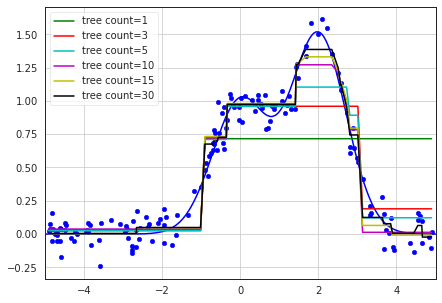

In [50]:
def predict_and_plot(model, X_test, y_test, title):
    y_predict = model.predict(X_test)

    plt.plot(X_test, f(X_test), "b")
    plt.scatter(X_train, y_train, c="b", s=20)
    plt.plot(X_test, y_predict, "g", lw=2)
    plt.xlim([-5, 5])
    plt.title("{} Loss: {:2f}".format(title, model.score(X_test, y_test)))
    plt.grid()



model = MyGradBoost(n_estimators=30, 
                    max_depth=1).fit(X_train, y_train)

ind =  [1,3,5,10,15,30]

# GradientBoostingRegressor
plt.plot(X_test, f(X_test), "b")
plt.scatter(X_train, y_train, c="b", s=20)
n_est = [1,3,5,10,15,30]
f = np.array(model.f_list)
for i, n in enumerate(n_est):
    colors = ['g', 'r', 'c', 'm', 'y', 'k']
    plt.plot(X_train, f[n-1], color=colors[i], label="tree count={}".format(n))

plt.xlim([-5, 5])   
plt.legend()
plt.grid()
plt.show()

# 5. AdaBoost step

Реализуйте одну итерацию алгоритма AdaBoost:

1. Обучите дерево $b$ на $X_{train}$ и верните $y_{pred}$

2. Найдите среднюю взвешанную ошибку
$$error = Q(b_t, X, y) = \frac{1}{N}\sum_{i=1}^{N}w_i^{(t-1)}[y_i \neq b_t(x)]$$

3. Найдите коэффициент $\alpha$ (для корректного выполнения добавим $eps$)
$$\alpha = \frac{1}{2}\ln\Big(\frac{1-error + eps}{error + eps}\Big)$$

4. Найдите новые веса:
$$w_i^{new} = w_iexp\Big(-\alpha y_i b(x_i)\Big)$$
$$\tilde{w}_i^{new} = \frac{w_i^{new}}{\sum_{i=1}^{N}w_i^{new}}$$

### Sample 1
#### Input:
```python
X_train = np.array([[0, 0], [4, 0], [0, 4], [4, 4]])
y_train = np.array([-1, -1, -1, 1])
```
#### Output:
```python
y_pred =  [-1 -1 -1 -1] 
error = 0.056 
alpha = 1.417 
new_weights = [0.05882403 0.41176819 0.02941201 0.49999576]
```

# TASK

In [ ]:
def boost_step(estimator, weights, X_train, y_train, eps = 1e-6):
    ### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
    return y_pred, error, alpha, new_weights

In [52]:
######################################################
X_train = np.array([[0, 0], [4, 0], [0, 4], [4, 4]])
y_train = np.array([-1, -1, -1, 1])

estimator = DTC(max_depth=1, random_state=4)
sample_weights = [0.1, 0.7, 0.05, 0.05]
y_pred, error, alpha, new_weights = boost_step(estimator, sample_weights, X_train, y_train)
assert_array_almost_equal(y_pred, np.array([-1, -1, -1, -1])) 
assert np.abs(error - 0.056) < 1e-2 
assert np.abs(alpha - 1.417) < 1e-2 
assert_array_almost_equal(new_weights, np.array([0.05882403, 0.41176819, 0.02941201, 0.49999576]))
######################################################
X_train = np.array([[0, 0], [3, 3], [5, 5], [10, 10]])
y_train = np.array([-1, -1, 1, 1])
estimator = DTC(max_depth=1, random_state=6)
sample_weights = [0.1, 0.7, 0.05, 0.05]

y_pred, error, alpha, new_weights = boost_step(estimator, sample_weights, X_train, y_train)


assert_array_almost_equal(y_pred, np.array([-1, -1, 1, 1])) 
assert np.abs(error - 0.0) < 1e-2 
assert np.abs(alpha - 6.907) < 1e-2 
assert_array_almost_equal(new_weights, np.array([0.11111111, 0.77777778, 0.05555556, 0.05555556]))


# 6. AdaBoost classifier

Реализуйте AdaBoost для бинарной классификации на деревьях высоты 1. Верните модель, которая будет хранить в себе `n_estimatos` обученных деревьев и коэффициенты, чтобы с их помощью потом найти результат предсказания.

Также необходимо реализовать логгирование в течение обучения.

* `self.sample_weights_list` - лист с весами объектов на каждой итерации
* `self.y_pred_list` - лист с предсказанием каждого следующего дерева (не комбинации)
* `self.error_list` - лист с ошибками

Примечания:

* Обрывать алгоритм не нужно, необходимо обучить все деревья.
* Начальные веса логгировать не нужно
* `predict_proba` реализовывать не нужно

### Sample 1
#### Input:
```python
n_estimators = 2
X_train = np.array([[0, 0], [4, 0], [0, 4], [4, 4]])
y_train = np.array([-1, -1, -1, 1])
X_test  = np.array([[1, 0], [5, 5]])
y_test  = np.array([-1, 1])
```
#### Output:
```python
y_test_pred = [0, 1]

model.sample_weight = [array([0.167, 0.167, 0.167, 0.5]), 
                       array([ 0.1,  0.5,  0.1, 0.3])]
model.y_pred = [array([-1, -1, -1, -1]),
                array([-1,  1, -1,  1])]

model.alpha = [0.25, 0.167]
```


# TASK

In [202]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier as DTC

class MyAdaBoost():
    def __init__(self, n_estimators=10):
        self.estimators_ = np.array([DTC(max_depth=1) for _ in range(n_estimators)])
        self.alpha = []
        self.sample_weights_list = []
        self.y_pred_list = []
        self.error_list = []
        
    def fit(self, X_train: np.array, y_train: np.array):
        ### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
        return self
        
    def predict(self, X_test) -> np.array:
        ### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
        pass


In [54]:
######################################################
X_train = np.array([[0, 0], [4, 0], [0, 4], [4, 4]])
y_train = np.array([-1, -1, -1, 1])
X_test  = np.array([[1, 0], [5, 5]])
y_test  = np.array([-1, 1])

model = MyAdaBoost(n_estimators = 2).fit(X_train, y_train)

y_pred_my = model.predict(X_test)

assert_array_almost_equal(y_pred_my, np.array([-1, 1]))

######################################################
X_train = np.array([[0, 0], [4, 4], [5, 5], [10, 10]])
y_train = np.array([-1, -1, 1, 1])
X_test  = np.array([[3, 3], [6, 6]])
y_test  = np.array([-1, 1])

model = MyAdaBoost(n_estimators = 2).fit(X_train, y_train)

y_pred_my = model.predict(X_test)

assert_array_almost_equal(y_pred_my, np.array([-1, 1]))
######################################################
num_samples = 1000
theta = np.linspace(0, 2*np.pi, num_samples)
r1 = 1
r2 = 2

rng = np.random.RandomState(1)

circle = np.hstack([np.cos(theta).reshape((-1, 1)) + (rng.randn(num_samples)[:,np.newaxis] / 8), 
                    np.sin(theta).reshape((-1, 1)) + (rng.randn(num_samples)[:,np.newaxis] / 8)])
lil = r1 * circle
big = r2 * circle
X = np.vstack([lil, big])
y = np.hstack([(-1) * np.ones(num_samples), np.ones(num_samples)])




X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=123,
                                                    shuffle=True)

y_test = y_test.astype('int')


y_pred_my = MyAdaBoost(n_estimators = 20).fit(X_train, y_train).predict(X_test)

assert accuracy_score(y_pred_my, y_test) > 0.95

## Useful graph

При корректной реализации логирования теперь можно посмотреть на ход обучения в картинках

Well Done!


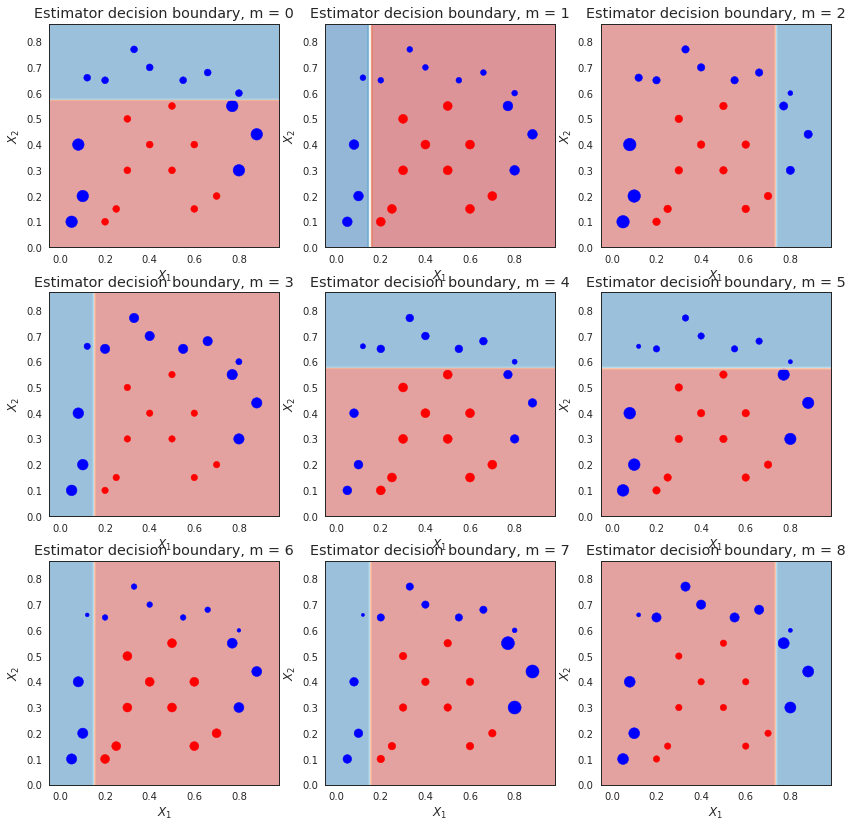

In [56]:
#Toy Dataset
x1 = np.array([.1,.2,.4,.8, .8, .05,.08,.12,.33,.55,.66,.77,.88,.2,.3,.4,.5,.6,.25,.3,.5,.7,.6])
x2 = np.array([.2,.65,.7,.6, .3,.1,.4,.66,.77,.65,.68,.55,.44,.1,.3,.4,.3,.15,.15,.5,.55,.2,.4])
y = np.array([1,1,1,1,1,1,1,1,1,1,1,1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1])
X = np.vstack((x1,x2)).T


boost = MyAdaBoost(n_estimators = 20).fit(X, y)
sample_weight_list = np.array(boost.sample_weight_list)
estimator_list = np.array(boost.estimators_)
alpha = np.array(boost.alpha)

fig = plt.figure(figsize = (14,14))
for m in range(0,9):
    fig.add_subplot(3,3,m+1)
    s_weights = (sample_weight_list[m,:] / sample_weight_list[m,:].sum() ) * 40
    plot_decision_boundary(estimator_list[m], X, y, N = 50, scatter_weights =s_weights )
    plt.title('Estimator decision boundary, m = {}'.format(m))
print('Well Done!')

# 7. Stacking

**Стэкинг** - 3-ий способ комбинирования алгоритмов, кроме бэггинга и бустинга. Он не часто используется, но его идея крайне полезная: `обучение на мета-признаках`.

1. Разобъем нашу обучающую выборку на 2 части: базовую и дополнительную.
2. Возьмем $N$ базовых алгоритмов и обучим их на **базовой части** разбив на $N$ фолдов. (Разбили на $N$ частей и обучаем алгоритм на всех частях кроме одной, как на кросс-валидации)
3. Каждым из обученных базовых алгоритмов предскажем значение для **дополнительной** части выборки.
4. Соберем **мета-выборку**, состоящую из предсказаний базовых алгоритмов на **доп выборе**. Пример: пусть для объекта $x_i$ базовые алгоритмы выдали $(y_i^1 = 1, y_i^2 = 0, y_i^3 = 1)$. Тогда признаками объекта в **мета-выборке** будет вектор $1, 0, 1$.
5. Обучим **мета-алгоритм** на **мета-выборке**. И получим готовую модель.
6. Чтобы получить результат на тестовой, теперь нужно сделать предсказания базовыми алгоритмами, собрать **мета-выборку** и сделать предсказания на **мета-алгоритме**.


# TASK

In [ ]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier as DTC

class Stacking():
    def __init__(self, n_estimators=5, max_depth=5):
        self.max_depth_ = max_depth
        self.n_estimators_ = n_estimators
        self.estimators_ = [DTC(max_depth=self.max_depth_) for _ in range(self.n_estimators_)]
        self.meta_estimator_ = DTC(max_depth=self.max_depth_)
        
    def fit(self, X: np.array, y: np.array): 
        ### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
        return self
        
    def predict(self, X_test) -> np.array:
        ### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
        return y_pred

In [60]:
import sklearn
df = pd.read_csv('data/forest_train.csv')

X = df.drop(columns=['Cover_Type', 'Id']).reset_index(drop=True)
y = df['Cover_Type']
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, train_size=0.3)

model = Stacking(max_depth=10, n_estimators=3).fit(X_train, y_train)

assert type(model.meta_estimator_) == sklearn.tree.DecisionTreeClassifier

y_pred = model.predict(X_test)
y_pred1 = model.estimators_[0].predict(X_test)
y_pred2 = model.estimators_[1].predict(X_test)
y_pred3 = model.estimators_[2].predict(X_test)

assert accuracy_score(y_pred, y_test) > 0.67

assert accuracy_score(y_pred1, y_test) < accuracy_score(y_pred, y_test)
assert accuracy_score(y_pred2, y_test) < accuracy_score(y_pred, y_test)
assert accuracy_score(y_pred3, y_test) < accuracy_score(y_pred, y_test)